<a href="https://colab.research.google.com/github/JuanYa1901/Evaluacion-2-Parte-2-/blob/main/620454_E3_Clasificacion_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2 Parte 2

---

**Integrante 1:** Leonardo Bustos Vallejos

**Correo Electrónico:** leonardo.bustos2001@alumnos.ubiobio.cl

**Integrante 2:** Javier Villena Novoa

**Correo Electrónico:** javier.villena2101@alumnos.ubiobio.cl

**Integrante 3:** Juan Javier Yáñez Romero

**Correo Electrónico:** juan.yanez1901@alumnos.ubiobio.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 3 de la asignatura de Inteligencia Artificial de la Universidad del Bío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [1]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv

--2025-06-13 01:20:37--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402467 (393K) [text/plain]
Saving to: ‘dataset_churn_2025.csv’

dataset_churn_2025. 100%[===================>] 393.03K  2.07MB/s    in 0.2s    

2025-06-13 01:20:37 (2.07 MB/s) - ‘dataset_churn_2025.csv’ saved [402467/402467]



# Descripción de la data

+ `age` - Edad del cliente (18 a 75 años)
+ `months_active` - Meses de suscripción activa
+ `monthly_spend` - Gasto mensuales en dólares
+ `support_calls` - Número de llamadas al soporte
+ `contract_type` - Tipo de contrato: `mes_a_mes`, `1_ano`, `2_anos`
+ `has_discount` - Tiene descuento activo (1 = sí, 0 = no)
+ `churm` - Variable objetivo: 1 = abandonó, 0 = NO abandonó

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,  classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.pipeline import Pipeline

from collections import Counter

In [3]:
data = pd.read_csv("dataset_churn_2025.csv")
data.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,mes_a_mes,1,0
1,69,57,182.60,4,1_ano,0,0
2,46,58,109.54,1,1_ano,1,0
3,32,35,125.52,4,mes_a_mes,1,1
4,60,24,199.34,4,mes_a_mes,1,1


In [4]:
data.describe()

,age,months_active,monthly_spend,support_calls,has_discount,churn
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,45.999400,29.946333,105.602195,1.998800,0.293467,0.334133
std,16.412736,17.073296,54.607273,1.416474,0.455366,0.471702
min,18.000000,1.000000,10.010000,0.000000,0.000000,0.000000
25%,32.000000,15.000000,58.770000,1.000000,0.000000,0.000000
50%,46.000000,30.000000,106.210000,2.000000,0.000000,0.000000
75%,60.000000,45.000000,152.312500,3.000000,1.000000,1.000000
max,74.000000,59.000000,199.980000,10.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15000 non-null  int64  
 1   months_active  15000 non-null  int64  
 2   monthly_spend  15000 non-null  float64
 3   support_calls  15000 non-null  int64  
 4   contract_type  15000 non-null  object 
 5   has_discount   15000 non-null  int64  
 6   churn          15000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 820.4+ KB


In [6]:
data.isnull().sum()

,0
age,0
months_active,0
monthly_spend,0
support_calls,0
contract_type,0
has_discount,0
churn,0


# Fase 4 - Modelamiento

## Modelo de clasificación

### Distribución de variable objetivo. (1 punto)

In [147]:
# Escriba su código acá

In [148]:
data_final = data
data_alt3 = data
data_final['churn'].value_counts()

,count
churn,
0,9988
1,5012


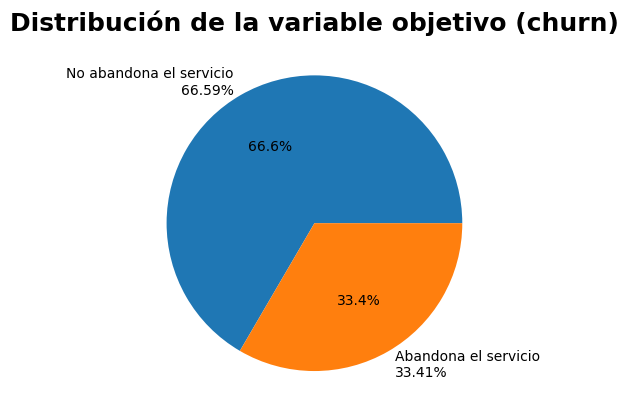

In [149]:
clases = np.array([data_final['churn'][data_final['churn'] == 0].count(),
                   data_final['churn'][data_final['churn'] == 1].count()])

labels = [str(round(x / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'No abandona el servicio\n' + labels[0]
labels[1] = 'Abandona el servicio\n' + labels[1]

plt.pie(clases, labels=labels, autopct='%1.1f%%')
plt.title('Distribución de la variable objetivo (churn)', fontsize=18, fontweight='bold')
plt.show()

En el contexto actual hay un importante porcentaje de clientes que no han abandonado el servicio, siendo poco mas del doble de quienes siguen con el servicio en comparación a quienes lo han abandonado.

In [150]:
le = LabelEncoder()
data_alt3['contract_type_modifiqued'] = le.fit_transform(data_alt3['contract_type'])

In [151]:
for original, codificado in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original} → {codificado}")

1_ano → 0
2_anos → 1
mes_a_mes → 2


In [152]:
data_alt3 = data_alt3.drop(columns=['contract_type'])

In [153]:
data_alt3.head()

,age,months_active,monthly_spend,support_calls,has_discount,churn,contract_type_modifiqued
0,56,15,181.55,2,1,0,2
1,69,57,182.60,4,0,0,0
2,46,58,109.54,1,1,0,0
3,32,35,125.52,4,1,1,2
4,60,24,199.34,4,1,1,2


In [154]:
corr_matrix = data_alt3[data_alt3.describe().columns].corr()
corr_matrix["churn"].sort_values(ascending=False)

,churn
churn,1.000000
contract_type_modifiqued,0.507387
support_calls,0.200268
monthly_spend,0.004057
age,-0.007458
has_discount,-0.199226
months_active,-0.223644


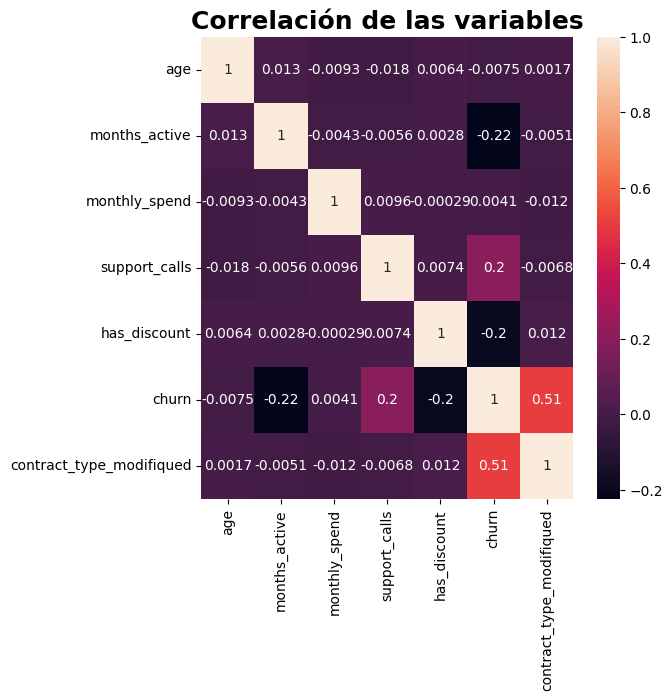

In [155]:
plt.figure(figsize=(6,6))
sns.heatmap(data_alt3.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

A partír del mapa de calor se logra deducir:
- **age:** una relación negativa, casi nula (-0.0075), lo que sugiere que , si bien es posible que haya una relación entre la edad y el abandono, esta es casi nula, por lo que es poco probable obtener datos relevantes para saber si un usuario abandonará o no los servicios.
- **months_active:** La relación es negativa y representativa (-0.22), es un indicativo de que mientras más ativo sea un usuario menos probable que abandone los servicios.
- **monthly_spend;** similar con la variable *age*: si bien su relación positiva puede sugerir una relación, esta es muy bajam casi nula (0.0041), por lo que no es posible obtener datos significativos.
- **support_calls:** Hay una relación positiva significativa (0.2), un indicaor de que si el usuario presenta varias llamadas a soporte técnico, es un indicador de que abandonará el servicio.
- **has_discount:** Presenta una relación significativa negativa (-0.22), lo que es un indicador de que usuarios con un descuento tenderán a no abandonar los servicios.
- **contract_type_modifiqued:** Relación positiva muy significativa (0.51), esto es un claro indicador de que el tipo de plan influye de manera significativa si el usuario abandonará los servicios.


### Selección de variables independientes (1 punto)

In [156]:
# Escriba su código acá

In [157]:
print(data_alt3.columns.tolist())


['age', 'months_active', 'monthly_spend', 'support_calls', 'has_discount', 'churn', 'contract_type_modifiqued']


<ipython-input-158-3458714271>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='age', data=data_alt3, palette='pastel')


Text(0.5, 0, 'Abandono de servicio')

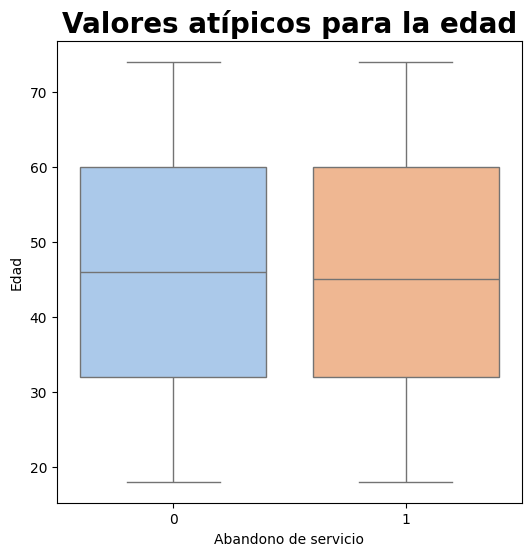

In [158]:
plt.figure(figsize=(6,6))
sns.boxplot(x='churn', y='age', data=data_alt3, palette='pastel')
plt.title("Valores atípicos para la edad", fontsize=20, fontweight="bold")
plt.ylabel("Edad")
plt.xlabel("Abandono de servicio")

In [159]:
pd.DataFrame(data_alt3.age.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,15000.0,45.9994,16.412736,18.0,32.0,46.0,60.0,74.0


Este gráfico sirve para comparar la edad de aquellos que han habandonado los servicios y quienes no. Como se puede apreciar, la diferencia entre ambos es tanto estadística como visualmente mínimas, casi inexistentes, por lo que la deducción relizada en el mapa de calor es correcta: no hay información relevante a considerar.

<ipython-input-160-2541457436>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='months_active', data=data_alt3, palette='pastel')


Text(0.5, 0, 'Abandono de servicio')

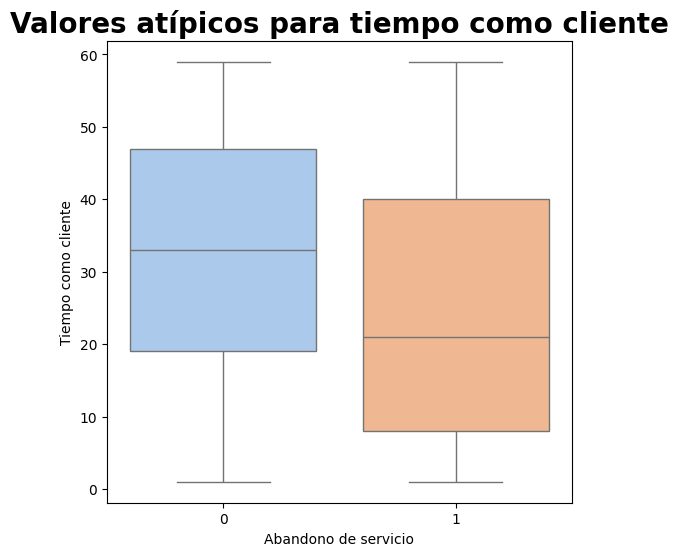

In [160]:
plt.figure(figsize=(6,6))
sns.boxplot(x='churn', y='months_active', data=data_alt3, palette='pastel')
plt.title("Valores atípicos para tiempo como cliente", fontsize=20, fontweight="bold")
plt.ylabel("Tiempo como cliente")
plt.xlabel("Abandono de servicio")

In [161]:
pd.DataFrame(data_alt3.months_active.describe()).T

,count,mean,std,min,25%,50%,75%,max
months_active,15000.0,29.946333,17.073296,1.0,15.0,30.0,45.0,59.0


Este gráfico compara la actividad de aquellos que abandonaron los servicios y quienes no.
Aquellos que abandonaron la plataforma tienden a estar usando los servicios que esta ofrece un menor tiempo que aquellos que siguen usando sus servicios.

<ipython-input-162-760443123>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='monthly_spend', data=data_alt3, palette='pastel')


Text(0.5, 0, 'Abandono de servicio')

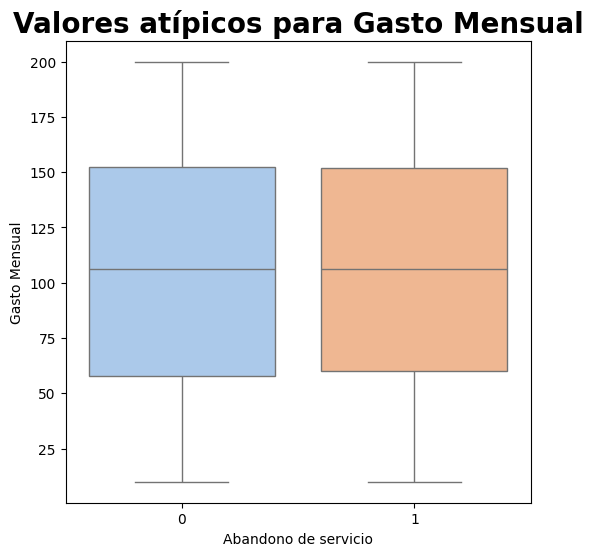

In [162]:
plt.figure(figsize=(6,6))
sns.boxplot(x='churn', y='monthly_spend', data=data_alt3, palette='pastel')
plt.title("Valores atípicos para Gasto Mensual", fontsize=20, fontweight="bold")
plt.ylabel("Gasto Mensual")
plt.xlabel("Abandono de servicio")

In [163]:
pd.DataFrame(data_alt3.monthly_spend.describe()).T

,count,mean,std,min,25%,50%,75%,max
monthly_spend,15000.0,105.602195,54.607273,10.01,58.77,106.21,152.3125,199.98


Este gráfico muestra la diferencia entre los pagos de aquellos que abandonan y no abandonan los servicios. Es apreciable una diferencia mínima, casi nula, por lo que no es posible etraer información relevante de esta gráfica, tal y como se dedujo en la matriz de correlación.

<ipython-input-164-858916181>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='support_calls', data=data_alt3, palette='pastel')


Text(0.5, 0, 'Abandono de servicio')

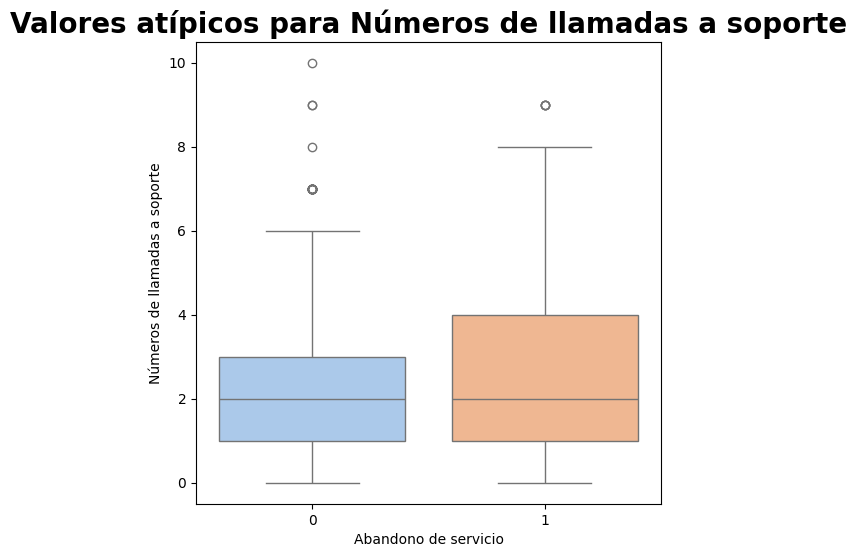

In [164]:
plt.figure(figsize=(6,6))
sns.boxplot(x='churn', y='support_calls', data=data_alt3, palette='pastel')
plt.title("Valores atípicos para Números de llamadas a soporte", fontsize=20, fontweight="bold")
plt.ylabel("Números de llamadas a soporte")
plt.xlabel("Abandono de servicio")

In [165]:
pd.DataFrame(data_alt3.support_calls.describe()).T

,count,mean,std,min,25%,50%,75%,max
support_calls,15000.0,1.9988,1.416474,0.0,1.0,2.0,3.0,10.0


En el gráfico se puede apreciar que el promedio de usuarios que abandonan y no abandonan es el mismo, pero aquellos que abandonan los servicios tienen más llamadas a soporte en su tercer cuartil, esto es un indicio de que aquellos que abandonan pueden presentar problemas con los servicios que se prestan y ser un motivo por el cual lo abandonan.

<ipython-input-166-1828198779>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='contract_type_modifiqued', data=data_alt3, palette='pastel')


Text(0.5, 0, 'Abandono de servicio')

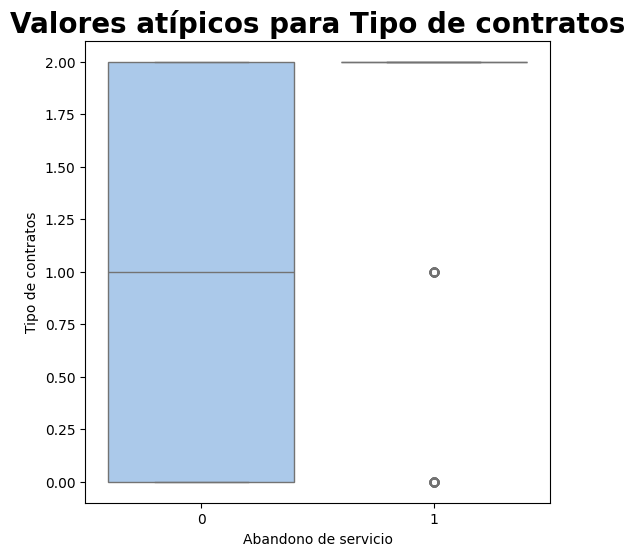

In [166]:
plt.figure(figsize=(6,6))
sns.boxplot(x='churn', y='contract_type_modifiqued', data=data_alt3, palette='pastel')
plt.title("Valores atípicos para Tipo de contratos", fontsize=20, fontweight="bold")
plt.ylabel("Tipo de contratos")
plt.xlabel("Abandono de servicio")

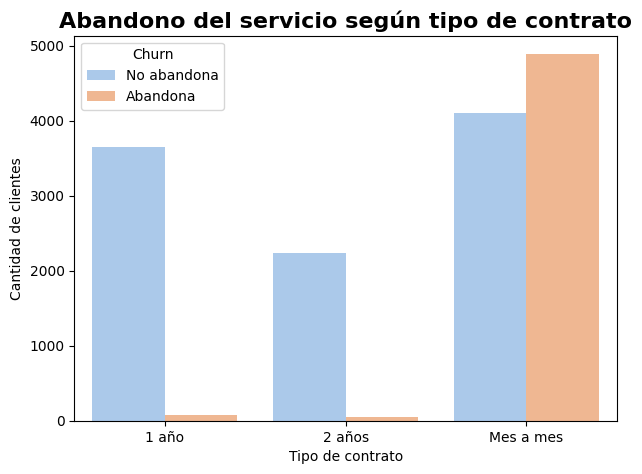

In [167]:
plt.figure(figsize=(7,5))
sns.countplot(x='contract_type_modifiqued', hue='churn', data=data_alt3, palette='pastel')
plt.xticks(ticks=[0, 1, 2], labels=["1 año", "2 años", "Mes a mes"])
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.title("Abandono del servicio según tipo de contrato", fontsize=16, fontweight="bold")
plt.legend(title="Churn", labels=["No abandona", "Abandona"])
plt.show()

In [168]:
pd.DataFrame(data_alt3.contract_type_modifiqued.describe()).T

,count,mean,std,min,25%,50%,75%,max
contract_type_modifiqued,15000.0,1.350733,0.851059,0.0,1.0,2.0,2.0,2.0


Al no haber diferencia interpretable con el gráfico de valores atípicos se decidió utilizar un gráfico de barras, comparando cada plan de forma individual con aquellos que abandonan los servicios y quienes no.

Se puede apreciar que aquellos que abandonan los servicios suelen ser aquellos que tienen contratados de mes a mes, siendo una diferencia significativa entre aquellos que no abandonan los servicios y los que si los abandonan cuando contratan los servicios por 1 año o mas.

<ipython-input-169-1367888195>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='has_discount', data=data_alt3, palette='pastel')


Text(0.5, 0, 'Abandono de servicio')

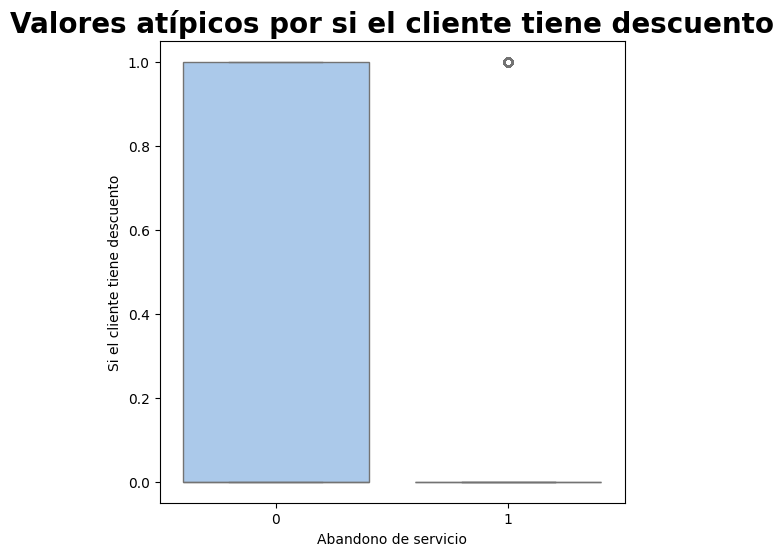

In [169]:
plt.figure(figsize=(6,6))
sns.boxplot(x='churn', y='has_discount', data=data_alt3, palette='pastel')
plt.title("Valores atípicos por si el cliente tiene descuento", fontsize=20, fontweight="bold")
plt.ylabel("Si el cliente tiene descuento")
plt.xlabel("Abandono de servicio")

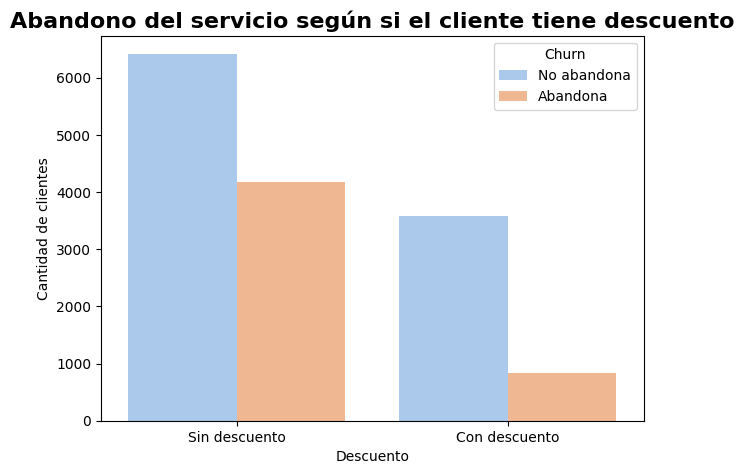

In [170]:
plt.figure(figsize=(7,5))
sns.countplot(x='has_discount', hue='churn', data=data_alt3, palette='pastel')
plt.xticks(ticks=[0, 1], labels=["Sin descuento", "Con descuento"])
plt.xlabel("Descuento")
plt.ylabel("Cantidad de clientes")
plt.title("Abandono del servicio según si el cliente tiene descuento", fontsize=16, fontweight="bold")
plt.legend(title="Churn", labels=["No abandona", "Abandona"])
plt.show()

In [171]:
pd.DataFrame(data_alt3.has_discount.describe()).T

,count,mean,std,min,25%,50%,75%,max
has_discount,15000.0,0.293467,0.455366,0.0,0.0,0.0,1.0,1.0


Al no haber diferencia interpretáble con el gráfico de valores atípicos se decidió utilizar un gráfico de barras para comparar aquellos que abandonan y presentan o no descuento.

Si bien abandonar los servicios de la plataforma aún es posible pese al descuento, la cantidad de usuarios que lo realiza es notoriamente inferior a los que no tienen descuento, por lo que es un indicio de que presentar o no un descuento influye en que los usuarios se mantengan utilizando los servicios de la plataforma.

### Separación datos entrenamiento y test (1 punto)

In [172]:
# Escriba su código acá

In [173]:
# Separar las variables
x = data_alt3[['contract_type_modifiqued', 'has_discount', 'support_calls', 'months_active']]
y = data_alt3['churn']

# Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=29)

### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo (1 punto)

In [174]:
# Escriba su código acá

In [175]:
tree_model = DecisionTreeClassifier(random_state=29)

#### Entrenamiento del modelo (1 punto)

In [176]:
# Escriba su código acá

In [177]:
tree_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=29)

In [178]:
y_pred_tree = tree_model.predict(x_test)

#### Evaluación del modelo - (1 punto)

In [179]:
etiquetas = ['No abandona el servicio', 'Abandona el servicio']
print(classification_report(y_test, y_pred_tree, target_names=etiquetas))

                         precision    recall  f1-score   support

No abandona el servicio       0.89      0.89      0.89      3288
   Abandona el servicio       0.78      0.78      0.78      1662

               accuracy                           0.85      4950
              macro avg       0.84      0.83      0.84      4950
           weighted avg       0.85      0.85      0.85      4950



El modelo es capaz de detectar un 89% de aquellos que efectivamente se quedan utilizando los servicios (un 89% de los 3288 usuarios).
Por otra parte, es capaz de detectar el 78% de aquellos que si abandonan la plataforma (un 78% de 1662 usuarios).

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [180]:
# Escriba su código acá

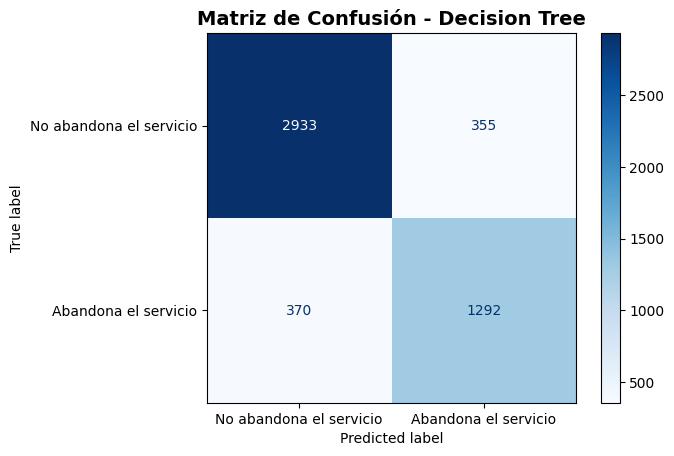

In [181]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=etiquetas)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Decision Tree", fontsize=14, fontweight="bold")
plt.show()

- El modelo predijo una cantidad de 3288 usuarios que se mantendrían con los servicios de las plataformas, pero solo 2928 usuarios efectivamente se mantuvieron usándola, habieno 360 falsos positivos.
- El modelo predijo que habrían 1662 usuarios que dejarían la plataforma, pero sólo 1295 de los predichos efectivamente abandonó sus servicios, siendo 367 usuarios los que se mantuvieron usándola.

##### Accuracy (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [182]:
# Escriba su código acá

In [183]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy del modelo Decision Tree: {accuracy_tree:.4f}")

Accuracy del modelo Decision Tree: 0.8535


El modelo "Decision Tree" acertó un 85,31% de las predicciones de que un usuario no abandonaría el servicio. También tiene un 14,69% de error de predicción que pueden ser falsos positivos o falsos negativos

### Algoritmo 2 - Naive Bayes

#### Creación del modelo - (1 punto)

In [184]:
# Escriba su código acá

In [185]:
nb = GaussianNB()

#### Entrenamiento del modelo - (1 punto)

In [186]:
# Escriba su código acá

In [187]:
nb.fit(x_train, y_train)

GaussianNB()

#### Evaluación del modelo - (1 punto)

#### Cálculo e interpretación de métricas

In [188]:
y_pred_nb = nb.predict(x_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      3288
           1       0.67      0.94      0.78      1662

    accuracy                           0.83      4950
   macro avg       0.82      0.85      0.82      4950
weighted avg       0.86      0.83      0.83      4950



El modelo es capaz de detectar un 77% de aquellos que efectivamente se quedan utilizando los servicios (96% de 3288 usuarios).
Por otra parte, es capaz de detectar el 94% de aquellos que si abandonan la plataforma (67% de 1662 usuarios).

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [189]:
# Escriba su código acá

In [190]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

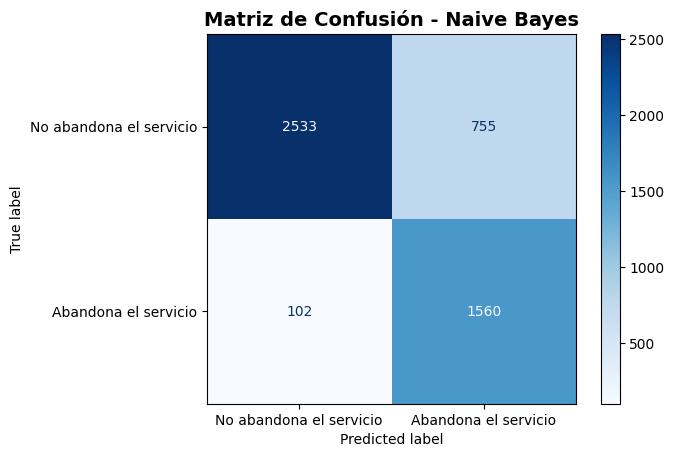

In [191]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=etiquetas)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Naive Bayes", fontsize=14, fontweight="bold")
plt.show()


- El modelo predijo una cantidad de 3288 usuarios que se mantendrían con los servicios de las plataformas, pero solo 2536 usuarios efectivamente se mantuvieron usándola, habiendo 752 falsos positivos.
- El modelo predijo que habrían 1662 usuarios que dejarían la plataforma, pero sólo 1557 de los predichos efectivamente abandonó sus servicios, siendo 105 usuarios los que se mantuvieron usándola.

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [192]:
# Escriba su código acá

In [193]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy del modelo Naive Bayes: {accuracy_nb:.4f}")

Accuracy del modelo Naive Bayes: 0.8269


El modelo "Naive Bayes" acertó un 82,69% de las predicciones de que un usuario no abandonaría el servicio. También tiene un 17,31% de error de predicción que pueden ser falsos positivos o falsos negativos

### Algoritmo 3 - Regresión Logística

#### Creación del modelo - (1 punto)

In [194]:
# Escriba su código acá

In [195]:
lr = LogisticRegression(random_state=29)

#### Entrenamiento del modelo - (1 punto)

In [196]:
# Escriba su código acá

In [197]:
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

#### Evaluación del modelo - (1 punto)

In [198]:
# Escriba su código acá

In [199]:
print(classification_report(y_test, y_pred_lr, target_names=etiquetas))

                         precision    recall  f1-score   support

No abandona el servicio       0.86      0.86      0.86      3288
   Abandona el servicio       0.73      0.72      0.72      1662

               accuracy                           0.81      4950
              macro avg       0.79      0.79      0.79      4950
           weighted avg       0.81      0.81      0.81      4950



El modelo es capaz de detectar un 87% de aquellos que efectivamente se quedan utilizando los servicios (86% de 3288 usuarios).

Por otra parte, es capaz de detectar el 72% de aquellos que si abandonan la plataforma (73% de 1662 usuarios).

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [200]:
# Escriba su código acá

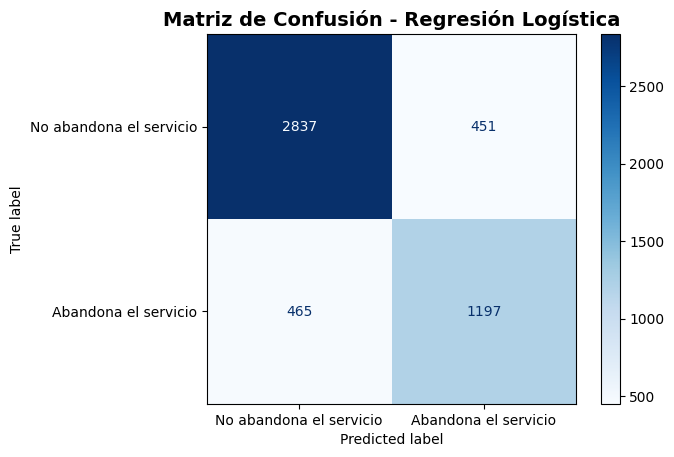

In [201]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etiquetas)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística", fontsize=14, fontweight="bold")
plt.show()

- El modelo predijo una cantidad de 3288 usuarios que se mantendrían con los servicios de las plataformas, pero solo 2536 usuarios efectivamente se mantuvieron usándola, habiendo 752 falsos positivos.
- El modelo predijo que habrían 1662 usuarios que dejarían la plataforma, pero sólo 1557 de los predichos efectivamente abandonó sus servicios, siendo 105 usuarios los que se mantuvieron usándola.

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [202]:
# Escriba su código acá

In [203]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy del modelo de Regresión Logística: {accuracy_lr:.4f}")

Accuracy del modelo de Regresión Logística: 0.8149


El modelo "Regresión Logística" acertó un 81,80% de las predicciones de que un usuario no abandonaría el servicio. También tiene un 18,20% de error de predicción que pueden ser falsos positivos o falsos negativos

### Algoritmo 4 - RandomForest

#### Creación del modelo - (1 punto)

In [204]:
# Escriba su código acá

In [205]:
rf = RandomForestClassifier(random_state=29)

#### Entrenamiento del modelo - (1 punto)

In [206]:
# Escriba su código acá

In [207]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

#### Evaluación del modelo - (1 punto)

In [208]:
# Escriba su código acá

In [209]:
print(classification_report(y_test, y_pred_rf, target_names=etiquetas))

                         precision    recall  f1-score   support

No abandona el servicio       0.90      0.88      0.89      3288
   Abandona el servicio       0.77      0.80      0.78      1662

               accuracy                           0.85      4950
              macro avg       0.83      0.84      0.83      4950
           weighted avg       0.85      0.85      0.85      4950



El modelo es capaz de detectar un 89% de aquellos que efectivamente se quedan utilizando los servicios (88% de 3288 usuarios).

Por otra parte, es capaz de detectar el 77% de aquellos que si abandonan la plataforma (77% de 1662 usuarios).

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [210]:
# Escriba su código acá

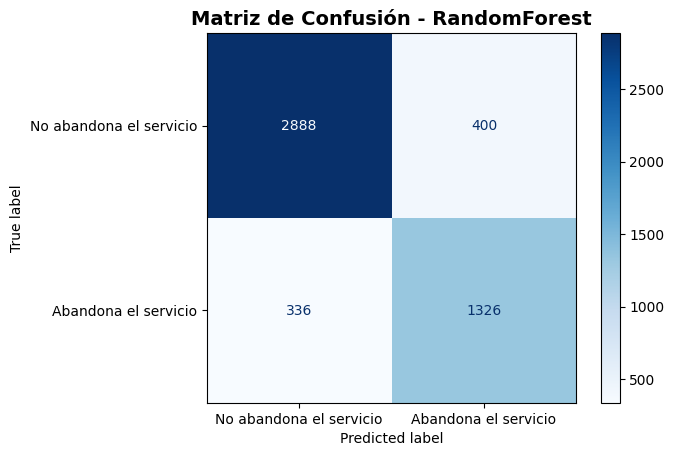

In [211]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=etiquetas)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - RandomForest", fontsize=14, fontweight="bold")
plt.show()

- El modelo predijo una cantidad de 3288 usuarios que se mantendrían con los servicios de las plataformas, pero solo 2915 usuarios efectivamente se mantuvieron usándola, habiendo 373 falsos positivos.
- El modelo predijo que habrían 1662 usuarios que dejarían la plataforma, pero sólo 1278 de los predichos efectivamente abandonó sus servicios, siendo 384 usuarios los que se mantuvieron usándola.

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [212]:
# Escriba su código acá

In [213]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy del modelo RandomForest: {accuracy_rf:.4f}")

Accuracy del modelo RandomForest: 0.8513


El modelo "Random Forest" acertó un 84,71% de las predicciones de que un usuario no abandonaría el servicio. También tiene un 15,29% de error de predicción que pueden ser falsos positivos o falsos negativos

### Comparación de los modelos - (2 puntos)

In [214]:
# Escriba su código acá

In [215]:
resultados = pd.DataFrame({
    "Modelo": ["Logistic Regression", "Naive Bayes", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_lr, accuracy_nb, accuracy_tree, accuracy_rf]
})

print(resultados)

                Modelo  Accuracy
0  Logistic Regression  0.814949
1          Naive Bayes  0.826869
2        Decision Tree  0.853535
3        Random Forest  0.851313


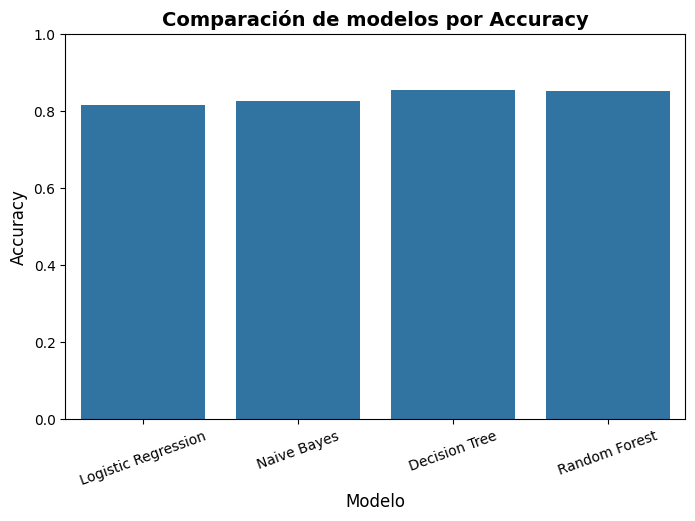

In [216]:
plt.figure(figsize=(8,5))
sns.barplot(x="Modelo", y="Accuracy", data=resultados)
plt.title("Comparación de modelos por Accuracy", fontsize=14, fontweight="bold")
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.xticks(rotation=20)
plt.show()

El modelo de árbol de decisión (Decision Tree) fue el más efectivo en este caso, logrando la mayor precisión global para predecir el abandono de servicio. Esto sugiere que el árbol de decisión es el modelo más adecuado.

Si bien no hay una diferencia muy significativa respecto a Random Forest, hay que considerar que de 3288 usuarios que se mantendrían usando los servicios, el modelo Decision Tree predijo correctamente 2928 usuarios que se mantendrían utilizando los servicios, mientras que el modelo Random Forest predijo solo 2915 correctamente.

Por esto se puede inferir que el modelo Decision Tree sigue siendo superior, ya que este predice con ligera superioridad quienes NO abandonan los servicios, por ende, no solo es mejor modelo en general, sino que también predecir correctamente el objetivo de modelo.